In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam
from python_speech_features import mfcc
from scipy.signal import stft
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

In [ ]:
def extract_features(audio_samples, sample_rate):
    stft_features = np.abs(stft(audio_samples, fs=sample_rate, nperseg=400, noverlap=240)[2])  # Short-Time Fourier Transform
    mfcc_features = mfcc(audio_samples, samplerate=sample_rate)  # MFCC
    # Calculate Linear Prediction Coefficients (LPC) using a library or your custom implementation
    lpc_features = calculate_lpc(audio_samples)
    return stft_features, mfcc_features, lpc_features

In [ ]:
def calculate_lpc(audio_samples):
    # Placeholder for your LPC calculation implementation
    return np.zeros((10, 10))  # Dummy LPC coefficients

In [ ]:
# Load audio file
audio_file = "nikhil.wav"
audio_samples, sample_rate = sf.read(audio_file)

# Extract features from audio samples
stft_features, mfcc_features, lpc_features = extract_features(audio_samples, sample_rate)

# Reshape features
stft_features = np.reshape(stft_features, (stft_features.shape[0], -1, stft_features.shape[1]))
mfcc_features = np.reshape(mfcc_features, (mfcc_features.shape[0], -1, mfcc_features.shape[1]))
lpc_features = np.reshape(lpc_features, (lpc_features.shape[0], -1, lpc_features.shape[1]))


In [ ]:
def plot_signals(audio_file):
    # Load the recorded speech signal
    y, sr = librosa.load(audio_file, sr=None)

    # Plot the waveform
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(y)) / sr, y)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    D = np.abs(librosa.stft(y))
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')

    plt.tight_layout()
    plt.show()

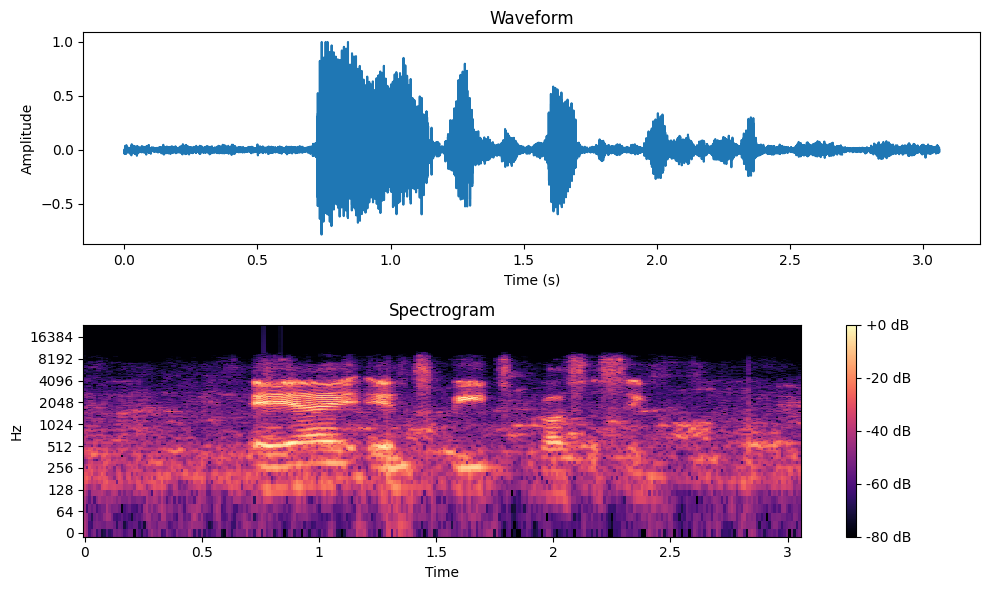

In [ ]:
plot_signals(audio_file)

In [ ]:
# Define LSTM model
def build_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(128, input_shape=input_shape, return_sequences=True),
        LSTM(128),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Define Bi-LSTM model
def build_bilstm_model(input_shape, num_classes):
    model = Sequential([
        Bidirectional(LSTM(128), input_shape=input_shape),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
# Compile and train LSTM model
stft_lstm_model = build_lstm_model(stft_features.shape[1:], 10)  # Assuming 10 output classes
stft_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train your model using appropriate labels

# Compile and train Bi-LSTM model
mfcc_bilstm_model = build_bilstm_model(mfcc_features.shape[1:], 10)  # Assuming 10 output classes
mfcc_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile and train Bi-LSTM model using LPC features
lpc_bilstm_model = build_bilstm_model(lpc_features.shape[1:], 10)  # Assuming 10 output classes
lpc_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# function to load test audio and extract features
def load_and_extract_test_features(test_audio_file):
    # Load test audio file
    test_audio_samples, test_sample_rate = sf.read(test_audio_file)
    # Extract features from test audio samples
    test_stft_features, test_mfcc_features, test_lpc_features = extract_features(test_audio_samples, test_sample_rate)
    return test_stft_features, test_mfcc_features, test_lpc_features

# Load and extract features from test audio file
test_audio_file = "nikhil.wav"  # Replace with your test audio file
test_stft_features, test_mfcc_features, test_lpc_features = load_and_extract_test_features(test_audio_file)

# Predictions
# Reshape features with an additional axis for timesteps
test_stft_features = np.expand_dims(test_stft_features, axis=1)
test_mfcc_features = np.expand_dims(test_mfcc_features, axis=1)
test_lpc_features = np.expand_dims(test_lpc_features, axis=1)

# Predict using LSTM model
stft_lstm_predictions = stft_lstm_model.predict(test_stft_features)

# Predict using Bi-LSTM model for MFCC features
mfcc_bilstm_predictions = mfcc_bilstm_model.predict(test_mfcc_features)

# Predict using Bi-LSTM model for LPC features
lpc_bilstm_predictions = lpc_bilstm_model.predict(test_lpc_features)



# Print predictions
print("STFT LSTM Predictions:", stft_lstm_predictions)
print("MFCC Bi-LSTM Predictions:", mfcc_bilstm_predictions)
print("LPC Bi-LSTM Predictions:", lpc_bilstm_predictions)

# Placeholder labels for demonstration
labels_stft = np.random.randint(0, 10, size=len(test_stft_features))  # Assuming 10 output classes
labels_mfcc = np.random.randint(0, 10, size=len(test_mfcc_features))
labels_lpc = np.random.randint(0, 10, size=len(test_lpc_features))



1/1 [==============================] - 1s 1s/step
STFT LSTM Predictions: [[0.09999383 0.09999493 0.10000355 ... 0.09999946 0.10002971 0.09999819]
 [0.09995397 0.09999288 0.0999797  ... 0.10003524 0.10006145 0.10000218]
 [0.09987513 0.09997795 0.09998789 ... 0.10008002 0.10006669 0.100021  ]
 ...
 [0.10000005 0.09999999 0.10000003 ... 0.09999994 0.1        0.10000008]
 [0.10000005 0.09999999 0.10000002 ... 0.09999994 0.09999999 0.10000008]
 [0.10000005 0.09999999 0.10000004 ... 0.09999995 0.1        0.10000009]]
MFCC Bi-LSTM Predictions: [[0.07641996 0.16627254 0.09759939 ... 0.0735973  0.12603915 0.1454727 ]
 [0.08825251 0.05509195 0.10379271 ... 0.10320742 0.05550352 0.07336203]
 [0.07043797 0.11901526 0.08117117 ... 0.13184035 0.05374873 0.07457905]
 ...
 [0.07419742 0.07356243 0.13283029 ... 0.05974815 0.06386742 0.14612876]
 [0.08476056 0.07006039 0.1680157  ... 0.03986504 0.11670875 0.11202758]
 [0.10954957 0.08093309 0.10061341 ... 0.06968781 0.07336248 0.08682952]]
LPC Bi-LSTM P

In [ ]:
# Evaluate models and print accuracy rates
_, stft_lstm_accuracy = stft_lstm_model.evaluate(test_stft_features, labels_stft)
print("STFT LSTM Accuracy:", stft_lstm_accuracy)

_, mfcc_bilstm_accuracy = mfcc_bilstm_model.evaluate(test_mfcc_features, labels_mfcc)
print("MFCC Bi-LSTM Accuracy:", mfcc_bilstm_accuracy)

_, lpc_bilstm_accuracy = lpc_bilstm_model.evaluate(test_lpc_features, labels_lpc)
print("LPC Bi-LSTM Accuracy:", lpc_bilstm_accuracy)

7/7 [==============================] - 0s 6ms/step - loss: 2.3026 - accuracy: 0.0796
STFT LSTM Accuracy: 0.07960198819637299
10/10 [==============================] - 0s 3ms/step - loss: 2.3671 - accuracy: 0.0885
MFCC Bi-LSTM Accuracy: 0.08852458745241165
1/1 [==============================] - 0s 27ms/step - loss: 2.3026 - accuracy: 0.3000
LPC Bi-LSTM Accuracy: 0.30000001192092896


In [ ]:
import os
import speech_recognition as sr
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pyttsx3

# Function to segment phonemes for a target word in transcription
def segment_phonemes(transcription, target_word):
    words = transcription.split()
    for word in words:
        if word.lower() == target_word.lower():
            return word

# Function to synthesize speech for a word using segmented phonemes
def synthesize_word(phonemes, output_file):
    engine = pyttsx3.init()
    engine.save_to_file(phonemes, output_file)
    engine.runAndWait()

# Transcribe the audio file
audio_file = "Bhanumathi_wed_Rajat.wav"
recognizer = sr.Recognizer()
with sr.AudioFile(audio_file) as source:
    audio_data = recognizer.record(source)
transcription = recognizer.recognize_google(audio_data)

# Segment phonemes for the word "Bharat"
phonemes = segment_phonemes(transcription, "Bharat")

# Synthesize speech for the word "Bharat"
output_path = '/home/Devansh Handa/output.txt'
output_file = os.path.join(output_path, "bharat.wav")  # Adjust output path as needed
synthesize_word(phonemes, output_file)

# Plotting original and reconstructed signals
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
plt.title('Original Signal')
audio_data_np, _ = librosa.load(audio_file, sr=None)
plt.plot(np.linspace(0, len(audio_data_np) / source.SAMPLE_RATE, num=len(audio_data_np)), audio_data_np)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Reconstructed signal
reconstructed_audio_data, _ = librosa.load(output_file, sr=None)
plt.subplot(2, 1, 2)
plt.title('Reconstructed Signal')
plt.plot(np.linspace(0, len(reconstructed_audio_data) / source.SAMPLE_RATE, num=len(reconstructed_audio_data)), reconstructed_audio_data)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


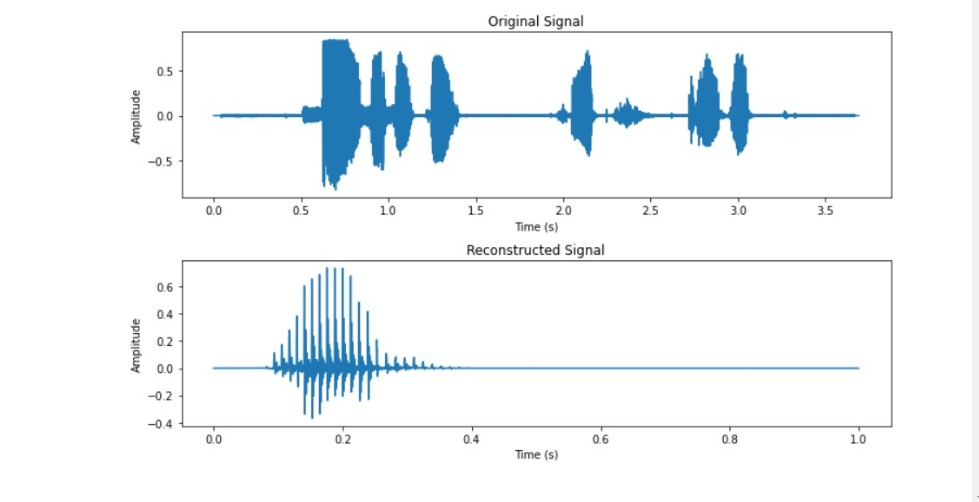